# Importing libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from scipy.stats import norm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Importing dataset

In [42]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample = pd.read_csv('sample_submission.csv')

# Exploratory data analysis

In [43]:
data_train.head()
#data_test.head()
#data_sample.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [44]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [45]:
data_train.describe(include=['O'])
#id cabin name

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [46]:
data_train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

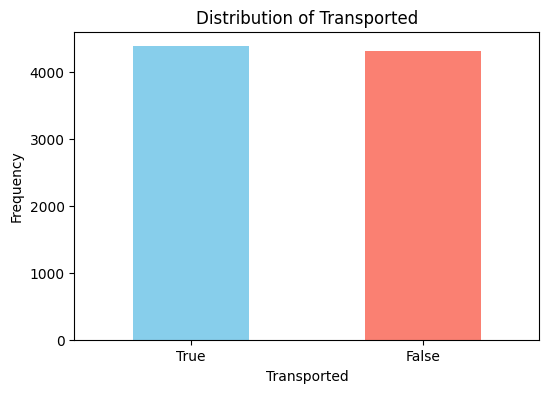

In [47]:

plt.figure(figsize=(6, 4))
data_train['Transported'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Transported')
plt.xlabel('Transported')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()


In [48]:
data_train['Transported'] = data_train['Transported'].map({True: 1, False: 0}).astype(int)
data_train[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [49]:

missing_values = data_train.isnull().sum()
missing_percentage = (data_train.isnull().sum() / len(data_train)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data

,Missing Values,Percentage (%)
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


In [50]:

missing_values_row = data_train.isnull().sum(axis=1)
rows_with_missing_values = data_train[missing_values_row >= 2]
print(rows_with_missing_values)


     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
59       0064_02        NaN      True     E/3/S  TRAPPIST-1e  33.0  False   
111      0115_01       Mars       NaN    F/24/P  TRAPPIST-1e  26.0  False   
181      0202_02     Europa     False     A/2/P  55 Cancri e   NaN  False   
186      0210_01        NaN      True     D/6/P  55 Cancri e  24.0  False   
251      0278_01      Earth     False       NaN  TRAPPIST-1e  35.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
8613     9194_01        NaN     False   E/603/S  55 Cancri e  53.0  False   
8623     9197_04     Europa     False   C/308/P  55 Cancri e  30.0  False   
8664     9246_01      Earth       NaN  G/1490/S  TRAPPIST-1e  32.0  False   
8666     9248_01        NaN     False  F/1792/S  55 Cancri e  38.0    NaN   
8675     9259_01      Earth       NaN  F/1893/P  TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck             Name 

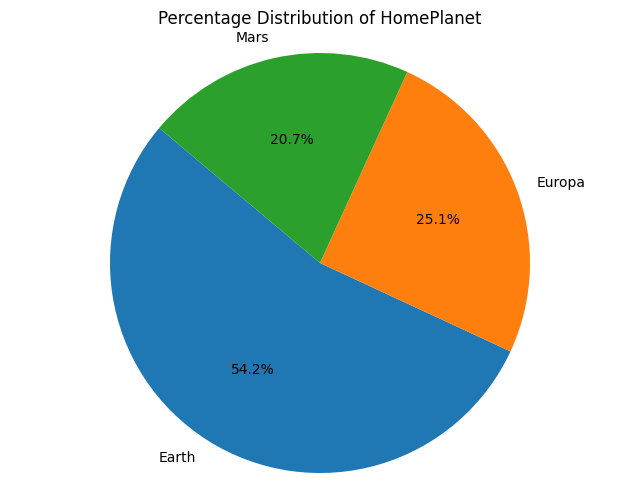

In [51]:

planet_distribution = data_train['HomePlanet'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
planet_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of HomePlanet')
plt.ylabel('') 
plt.axis('equal')  
plt.show()


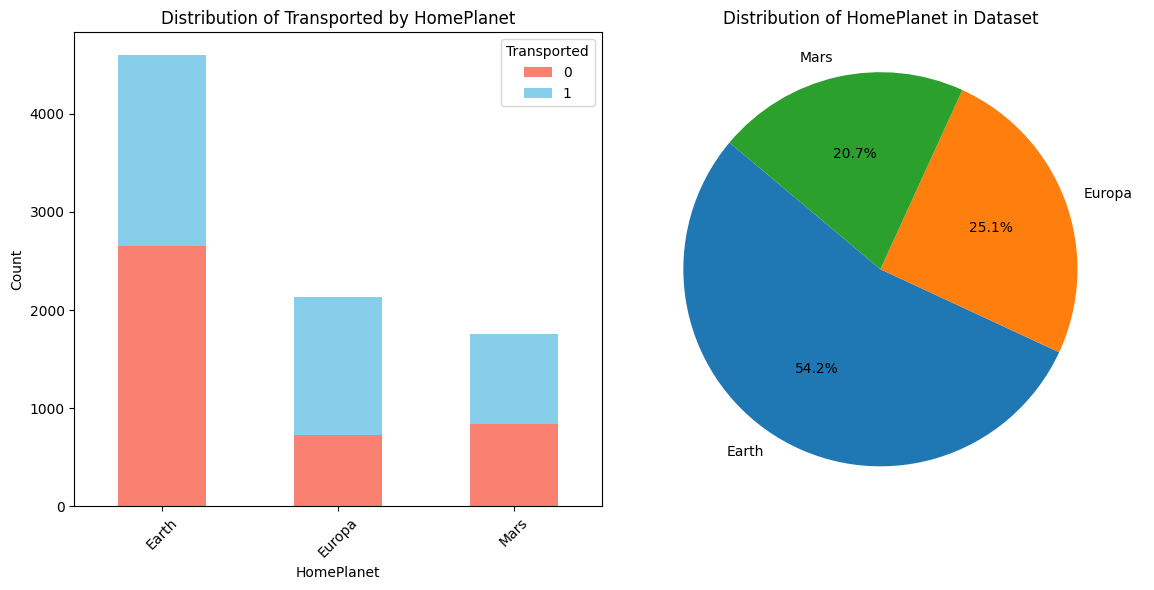

In [52]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
transported_by_homeplanet = data_train.groupby(['HomePlanet', 'Transported']).size().unstack()
transported_by_homeplanet.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], ax=plt.gca())
plt.title('Distribution of Transported by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Transported')


plt.subplot(1, 2, 2)
homeplanet_distribution = data_train['HomePlanet'].value_counts()
homeplanet_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=plt.gca())
plt.title('Distribution of HomePlanet in Dataset')
plt.ylabel('')
plt.axis('equal')

plt.tight_layout()
plt.show()


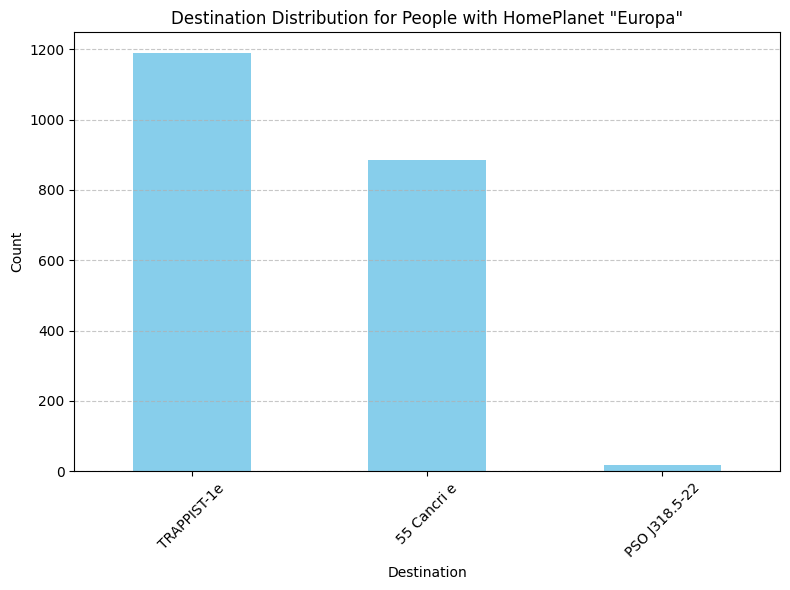

In [53]:

europa_data = data_train[data_train['HomePlanet'] == 'Europa']
destination_distribution = europa_data['Destination'].value_counts()

plt.figure(figsize=(8, 6))
destination_distribution.plot(kind='bar', color='skyblue')
plt.title('Destination Distribution for People with HomePlanet "Europa"')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


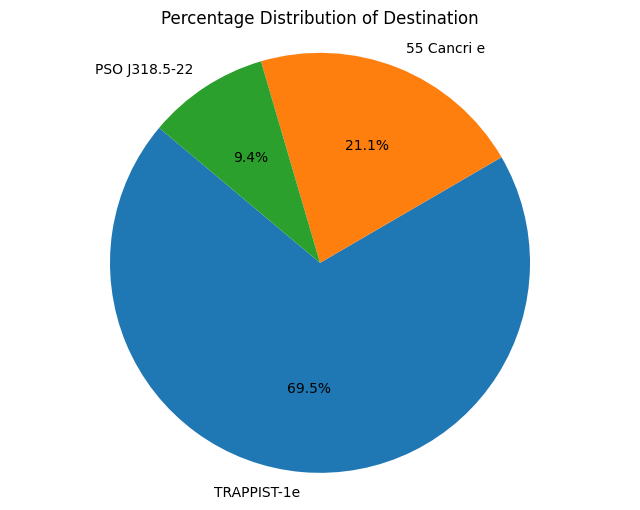

In [54]:

planet_distribution = data_train['Destination'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 6))
planet_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Destination')
plt.ylabel('')  
plt.axis('equal')  
plt.show()


In [55]:
passagers_jeunes = data_train[data_train['Age'] <= 14]

variables = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

pourcentage_zero = {var: (passagers_jeunes[var] == 0).mean() * 100 for var in variables}

pourcentage_non_zero = {var: 100 - pourcentage for var, pourcentage in pourcentage_zero.items()}

df_pourcentages = pd.DataFrame({'Variable': variables, 'Pourcentage_0': pourcentage_zero.values(), 'Pourcentage_non_0': pourcentage_non_zero.values()})

print(df_pourcentages)


       Variable  Pourcentage_0  Pourcentage_non_0
0   RoomService      89.216590          10.783410
1     FoodCourt      91.059908           8.940092
2  ShoppingMall      89.308756          10.691244
3           Spa      90.691244           9.308756
4        VRDeck      89.861751          10.138249


C:\Users\valen\AppData\Local\Temp\ipykernel_24548\2580900379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stand["Depense"] = stand[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)


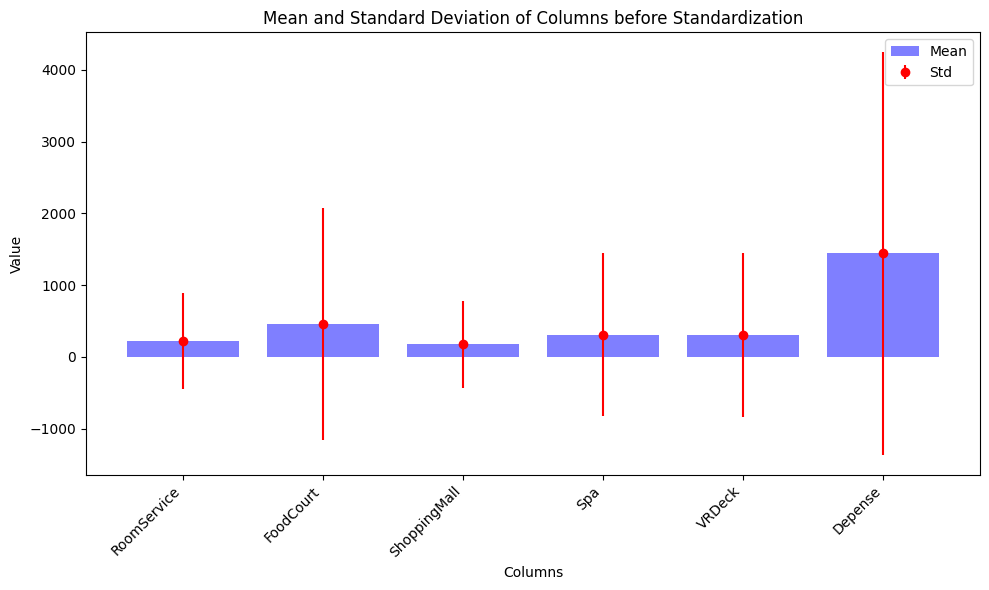

In [56]:
stand = data_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
stand["Depense"] = stand[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

means = stand.mean()
stds = stand.std()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(means.index, means, color='blue', alpha=0.5, label='Mean')

ax.errorbar(means.index, means, yerr=stds, fmt='o', color='red', label='Std')

ax.set_title('Mean and Standard Deviation of Columns before Standardization')
ax.set_xlabel('Columns')
ax.set_ylabel('Value')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


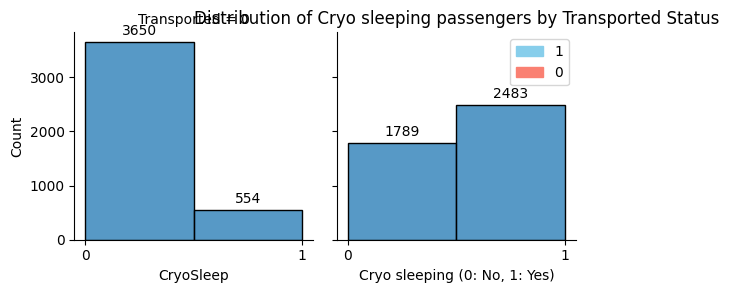

In [57]:

transported_colors = {1: 'skyblue', 0: 'salmon'}

g = sns.FacetGrid(data_train, col='Transported')

g.map(sns.histplot, 'CryoSleep', bins=2, multiple="stack", palette=transported_colors)

plt.xlabel('Cryo sleeping (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Cryo sleeping passengers by Transported Status')

handles = [plt.Rectangle((0,0),1,1, color=transported_colors[label]) for label in transported_colors]
plt.legend(handles, transported_colors.keys(), loc='upper right')

plt.xticks(ticks=[0, 1])

for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

plt.show()


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


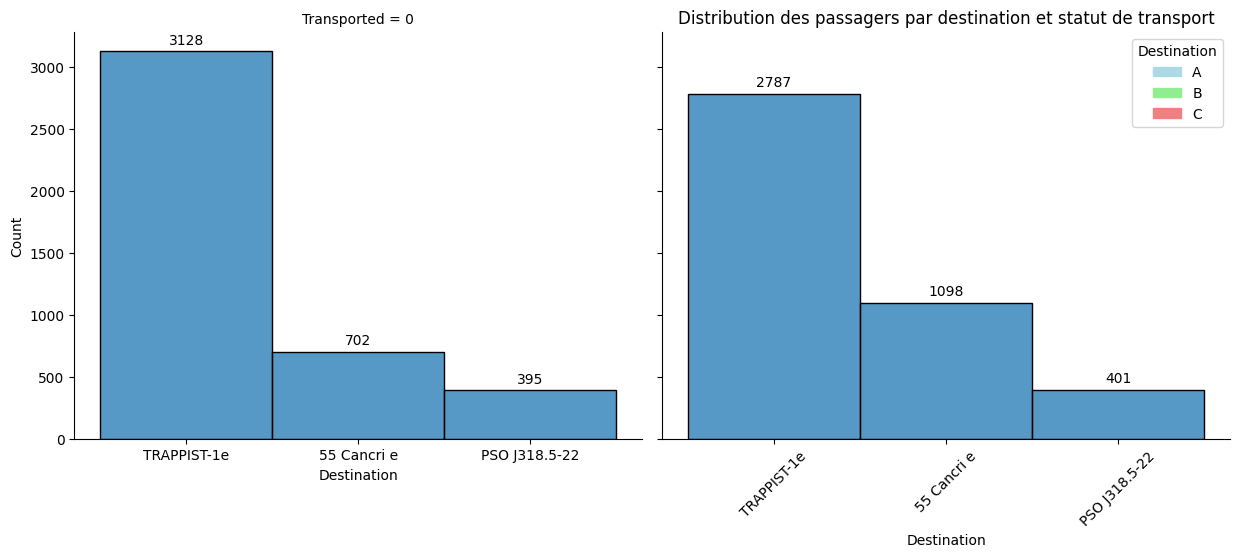

In [58]:

destination_colors = {'A': 'lightblue', 'B': 'lightgreen', 'C': 'lightcoral'}
g = sns.FacetGrid(data_train, col='Transported', height=5, aspect=1.25)
g.map(sns.histplot, 'Destination', bins=3, multiple="stack", palette=destination_colors.values())


plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Distribution des passagers par destination et statut de transport')

handles = [plt.Rectangle((0,0),1,1, color=color) for color in destination_colors.values()]
plt.legend(handles, destination_colors.keys(), loc='upper right', title='Destination')


plt.xticks(rotation=45)

for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

plt.show()


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


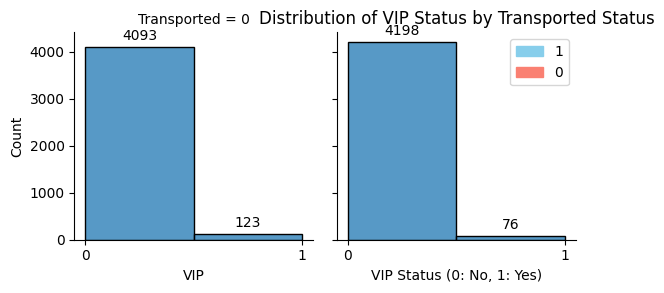

In [59]:

transported_colors = {1: 'skyblue', 0: 'salmon'}
g = sns.FacetGrid(data_train, col='Transported')

g.map(sns.histplot, 'VIP', bins=2, multiple="stack", palette=transported_colors)

plt.xlabel('VIP Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of VIP Status by Transported Status')

handles = [plt.Rectangle((0,0),1,1, color=transported_colors[label]) for label in transported_colors]
plt.legend(handles, transported_colors.keys(), loc='upper right')

plt.xticks(ticks=[0, 1])

for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

plt.show()


# Data preprocessing

In [60]:

def detecter_groupe(data_train):
    data_train['Group'] = data_train['PassengerId'].str[:4]
    occurences_groupes = data_train['Group'].value_counts()
    data_train['DansGroupe'] = data_train['Group'].map(occurences_groupes) > 1


detecter_groupe(data_train)
    
    
def remplir_colonne_par_groupe(data_train, colonne):
    modif_grp = 0
    
    for groupe in data_train['Group'].unique():
        groupe_data = data_train[data_train['Group'] == groupe]
        groupe_non_nul = groupe_data.dropna(subset=[colonne])     
        valeur_frequente = groupe_non_nul[colonne].mode()
        
        if not valeur_frequente.empty:
            valeur_frequente = valeur_frequente.iloc[0]
            groupe_nan = groupe_data[groupe_data[colonne].isnull()]
            data_train.loc[groupe_nan.index, colonne] = valeur_frequente
            modif_grp += len(groupe_nan)
    
    return modif_grp


def remplacer_valeurs(data_train, colonnes):
    modifs = {}
    for colonne in colonnes:
        modifs[colonne] = remplir_colonne_par_groupe(data_train, colonne)
    
    for colonne in colonnes:
        valeur_frequente = data_train[colonne].mode()[0]
        data_train[colonne] = data_train[colonne].fillna(valeur_frequente)


colonnes_a_modifier = ["HomePlanet", "Destination", "VIP", "CryoSleep"]
remplacer_valeurs(data_train, colonnes_a_modifier)


def remplacer_valeurs_cryosleep(data_train):
    valeur = data_train["CryoSleep"].mode()[0]
    data_train["CryoSleep"] = data_train["CryoSleep"].fillna(valeur)

def remplacer_valeurs_manquantes_age(data_train):
    moyenne_age = data_train['Age'].mean()
    nb_modifications = data_train['Age'].isnull().sum()
    data_train['Age'] = data_train['Age'].fillna(moyenne_age)
    nb_modifications_apres = data_train['Age'].isnull().sum()
    print(f"Nombre de cases modifiees dans Age: {nb_modifications - nb_modifications_apres}")


def remplacer_valeurs_depense(data_train):
    colonnes = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    moyennes = data_train[colonnes].mean()

    for colonne in colonnes:
        data_train[colonne] = data_train[colonne].fillna(
            data_train.apply(lambda row: moyennes[colonne] if (row['Age'] >= 12 or row['CryoSleep'] == 1) else 0, axis=1)
        )

remplacer_valeurs_depense(data_train)
remplacer_valeurs_manquantes_age(data_train)
data_train.drop(columns=['Name'], inplace=True)
data_train.drop(columns=['Group'], inplace=True)
print(data_train.isnull().sum())


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_num_stand = scaler.fit_transform(data_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
data_num_stand = pd.DataFrame(data_num_stand, columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])

print(data_num_stand)
colones = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for colone in colones:
    data_train[colone] = data_num_stand[colone] 
    
print(data_train)

C:\Users\valen\AppData\Local\Temp\ipykernel_24548\1364147135.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train[colonne] = data_train[colonne].fillna(valeur_frequente)


Nombre de cases modifiees dans Age: 179
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
DansGroupe        0
dtype: int64
      RoomService  FoodCourt  ShoppingMall       Spa    VRDeck
0       -0.340383  -0.287073     -0.290503 -0.276498 -0.268446
1       -0.175162  -0.281428     -0.248656  0.211660 -0.229620
2       -0.275204   1.955782     -0.290503  5.694323 -0.225208
3       -0.340383   0.517620      0.330512  2.683571 -0.098143
4        0.118901  -0.243169     -0.037745  0.225887 -0.266681
...           ...        ...           ...       ...       ...
8688    -0.340383   3.989781     -0.290503  1.184419 -0.203148
8689    -0.340383  -0.287073     -0.290503 -0.276498 -0.268446
8690    -0.340383  -0.287073      2.843027 -0.275609 -0.268446
8691    -0.340383   0.370856     -0.2

In [61]:
data_train[['Deck', 'Num', 'Side']] = data_train['Cabin'].str.extract(r'([A-G])/(\d+)/([PS])')

deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
data_train['Deck'] = data_train['Deck'].map(deck_mapping)

data_train['Side'] = data_train['Side'].map({'P': 0, 'S': 1})#

data_train['Deck'] = pd.to_numeric(data_train['Deck'])
data_train['Num'] = pd.to_numeric(data_train['Num'])

print(data_train.head())

  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  Transported  \
0    -0.340383  -0.287073     -0.290503 -0.276498 -0.268446            0   
1    -0.175162  -0.281428     -0.248656  0.211660 -0.229620            1   
2    -0.275204   1.955782     -0.290503  5.694323 -0.225208            0   
3    -0.340383   0.517620      0.330512  2.683571 -0.098143            0   
4     0.118901  -0.243169     -0.037745  0.225887 -0.266681            1   

   DansGroupe  Deck  Num  Side  
0       False   2.0  0.0   0.0  
1       False   6.0  0.0   1.0  
2        Tr

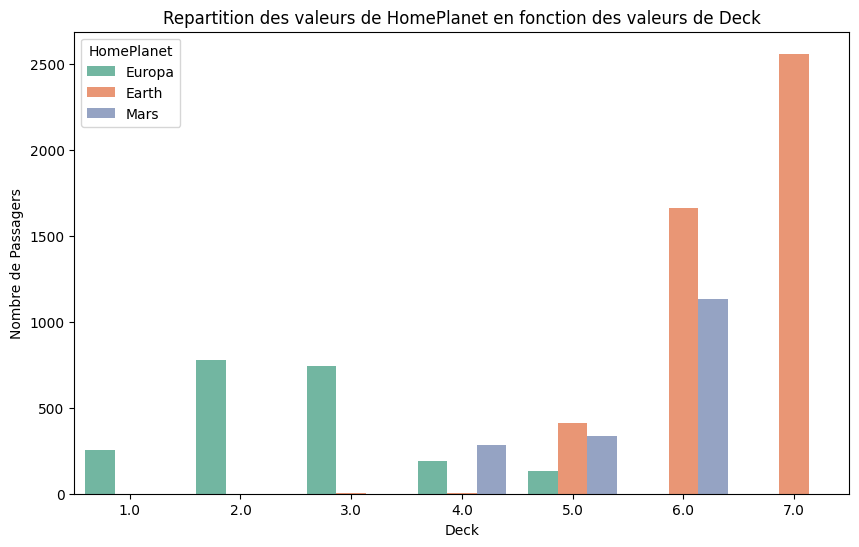

In [62]:

plt.figure(figsize=(10, 6))

sns.countplot(x='Deck', hue='HomePlanet', data=data_train, palette='Set2')

plt.title('Repartition des valeurs de HomePlanet en fonction des valeurs de Deck')
plt.xlabel('Deck')
plt.ylabel('Nombre de Passagers')

plt.legend(title='HomePlanet')

plt.show()


In [63]:
def remplacer_valeurs_manquantes(row):
    if pd.isnull(row['Deck']):
        if row['HomePlanet'] == 'Europa':
            return np.random.choice([2.0, 3.0])
        elif row['HomePlanet'] == 'Mars':
            return np.random.choice([4.0, 5.0, 6.0])
        elif row['HomePlanet'] == 'Earth':
            return np.random.choice([6.0, 7.0])
    else:
        return row['Deck']

data_train['Deck'] = data_train.apply(remplacer_valeurs_manquantes, axis=1)

data_train['Side'].fillna(data_train['Side'].mode()[0], inplace=True)

print(data_train.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
DansGroupe        0
Deck              0
Num             204
Side              0
dtype: int64


C:\Users\valen\AppData\Local\Temp\ipykernel_24548\1507863114.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Side'].fillna(data_train['Side'].mode()[0], inplace=True)


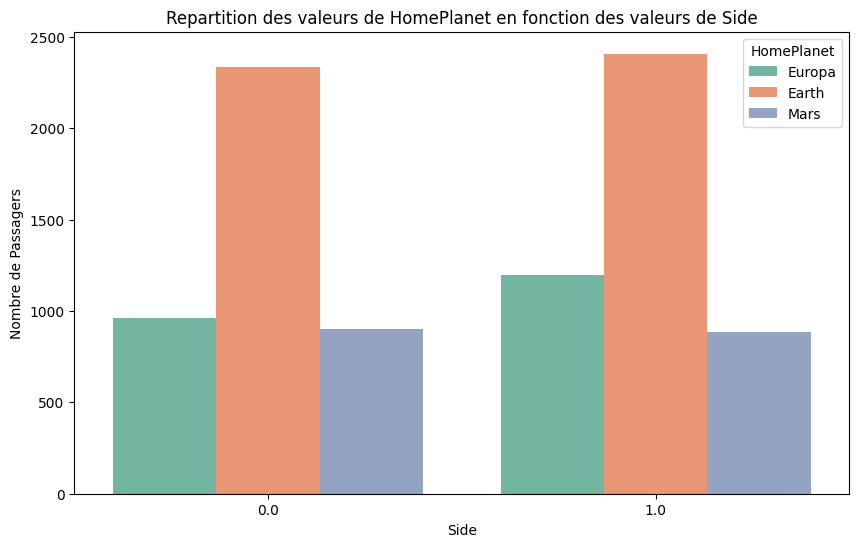

In [64]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Side', hue='HomePlanet', data=data_train, palette='Set2')
plt.title('Repartition des valeurs de HomePlanet en fonction des valeurs de Side')
plt.xlabel('Side')
plt.ylabel('Nombre de Passagers')

plt.legend(title='HomePlanet')

plt.show()


In [65]:
homeplanet_dummies = pd.get_dummies(data_train["HomePlanet"], prefix = "HomePlanet")

destination_dummies = pd.get_dummies(data_train["Destination"], prefix = "Destination")

data_train = pd.concat([data_train, homeplanet_dummies, destination_dummies], axis = 1)


data_train.drop(columns=['Destination'], inplace=True)
data_train.drop(columns=['HomePlanet'], inplace=True)
print(data_train)

     PassengerId  CryoSleep     Cabin   Age    VIP  RoomService  FoodCourt  \
0        0001_01      False     B/0/P  39.0  False    -0.340383  -0.287073   
1        0002_01      False     F/0/S  24.0  False    -0.175162  -0.281428   
2        0003_01      False     A/0/S  58.0   True    -0.275204   1.955782   
3        0003_02      False     A/0/S  33.0  False    -0.340383   0.517620   
4        0004_01      False     F/1/S  16.0  False     0.118901  -0.243169   
...          ...        ...       ...   ...    ...          ...        ...   
8688     9276_01      False    A/98/P  41.0   True    -0.340383   3.989781   
8689     9278_01       True  G/1499/S  18.0  False    -0.340383  -0.287073   
8690     9279_01      False  G/1500/S  26.0  False    -0.340383  -0.287073   
8691     9280_01      False   E/608/S  32.0  False    -0.340383   0.370856   
8692     9280_02      False   E/608/S  44.0  False    -0.149393   2.653225   

      ShoppingMall       Spa    VRDeck  Transported  DansGroupe

In [66]:

side_dummies = pd.get_dummies(data_train['Side'], prefix='Side')
deck_dummies = pd.get_dummies(data_train['Deck'], prefix='Deck')

# Concatener les nouvelles variables binaires a votre DataFrame original
data_train = pd.concat([data_train, deck_dummies, side_dummies], axis=1)

# Supprimer la colonne 'Cabin' originale si necessaire
data_train.drop('Deck', axis=1, inplace=True)
data_train.drop('Num', axis=1, inplace=True)
data_train.drop('Side', axis=1, inplace=True)
data_train.drop('Cabin', axis=1, inplace=True)

pd.set_option('display.max_columns', None)

# Afficher les premieres lignes du DataFrame
print(data_train.head())
data_train.to_csv('data_train_tr.csv', index=False)
data_train = pd.read_csv('data_train_tr.csv')

  PassengerId  CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0     0001_01      False  39.0  False    -0.340383  -0.287073     -0.290503   
1     0002_01      False  24.0  False    -0.175162  -0.281428     -0.248656   
2     0003_01      False  58.0   True    -0.275204   1.955782     -0.290503   
3     0003_02      False  33.0  False    -0.340383   0.517620      0.330512   
4     0004_01      False  16.0  False     0.118901  -0.243169     -0.037745   

        Spa    VRDeck  Transported  DansGroupe  HomePlanet_Earth  \
0 -0.276498 -0.268446            0       False             False   
1  0.211660 -0.229620            1       False              True   
2  5.694323 -0.225208            0        True             False   
3  2.683571 -0.098143            0        True             False   
4  0.225887 -0.266681            1       False              True   

   HomePlanet_Europa  HomePlanet_Mars  Destination_55 Cancri e  \
0               True            False             

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,DansGroupe,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
PassengerId,1.000000,-0.006133,-0.009347,0.013608,-0.000235,-0.009418,0.017093,-0.005098,0.015363,0.021491,0.000268,0.001736,0.005810,-0.008352,-0.002967,0.013086,-0.005637
CryoSleep,-0.006133,1.000000,-0.070971,-0.077880,-0.243680,-0.202044,-0.205895,-0.198562,-0.192306,0.458001,0.101725,-0.114520,0.099825,0.034334,0.068300,0.083120,-0.113006
Age,-0.009347,-0.070971,1.000000,0.091574,0.067944,0.128343,0.033045,0.121221,0.100053,-0.074249,-0.133769,-0.204318,0.220245,0.016182,0.015182,-0.028781,0.004731
VIP,0.013608,-0.077880,0.091574,1.000000,0.056623,0.126038,0.018529,0.060596,0.123169,-0.037261,0.034027,-0.163169,0.146876,0.043951,0.046219,-0.001136,-0.040225
RoomService,-0.000235,-0.243680,0.067944,0.056623,1.000000,-0.015385,0.053115,0.009997,-0.018963,-0.242077,-0.020126,-0.140363,-0.069397,0.247154,-0.025640,-0.063095,0.062568
FoodCourt,-0.009418,-0.202044,0.128343,0.126038,-0.015385,1.000000,-0.014110,0.220673,0.224449,0.045909,0.066623,-0.214959,0.365625,-0.126189,0.135032,-0.065657,-0.078144
ShoppingMall,0.017093,-0.205895,0.033045,0.018529,0.053115,-0.014110,1.000000,0.013724,-0.007166,0.009853,-0.029123,-0.071837,-0.023141,0.113257,-0.014710,-0.031254,0.032772
Spa,-0.005098,-0.198562,0.121221,0.060596,0.009997,0.220673,0.013724,1.000000,0.148138,-0.218817,0.043249,-0.160687,0.267949,-0.088591,0.076570,-0.053690,-0.033915
VRDeck,0.015363,-0.192306,0.100053,0.123169,-0.018963,0.224449,-0.007166,0.148138,1.000000,-0.204930,0.043450,-0.155564,0.284914,-0.113048,0.091103,-0.045705,-0.051833
Transported,0.021491,0.458001,-0.074249,-0.037261,-0.242077,0.045909,0.009853,-0.218817,-0.204930,1.000000,0.113792,-0.172221,0.179756,0.019941,0.109467,-0.001125,-0.096261


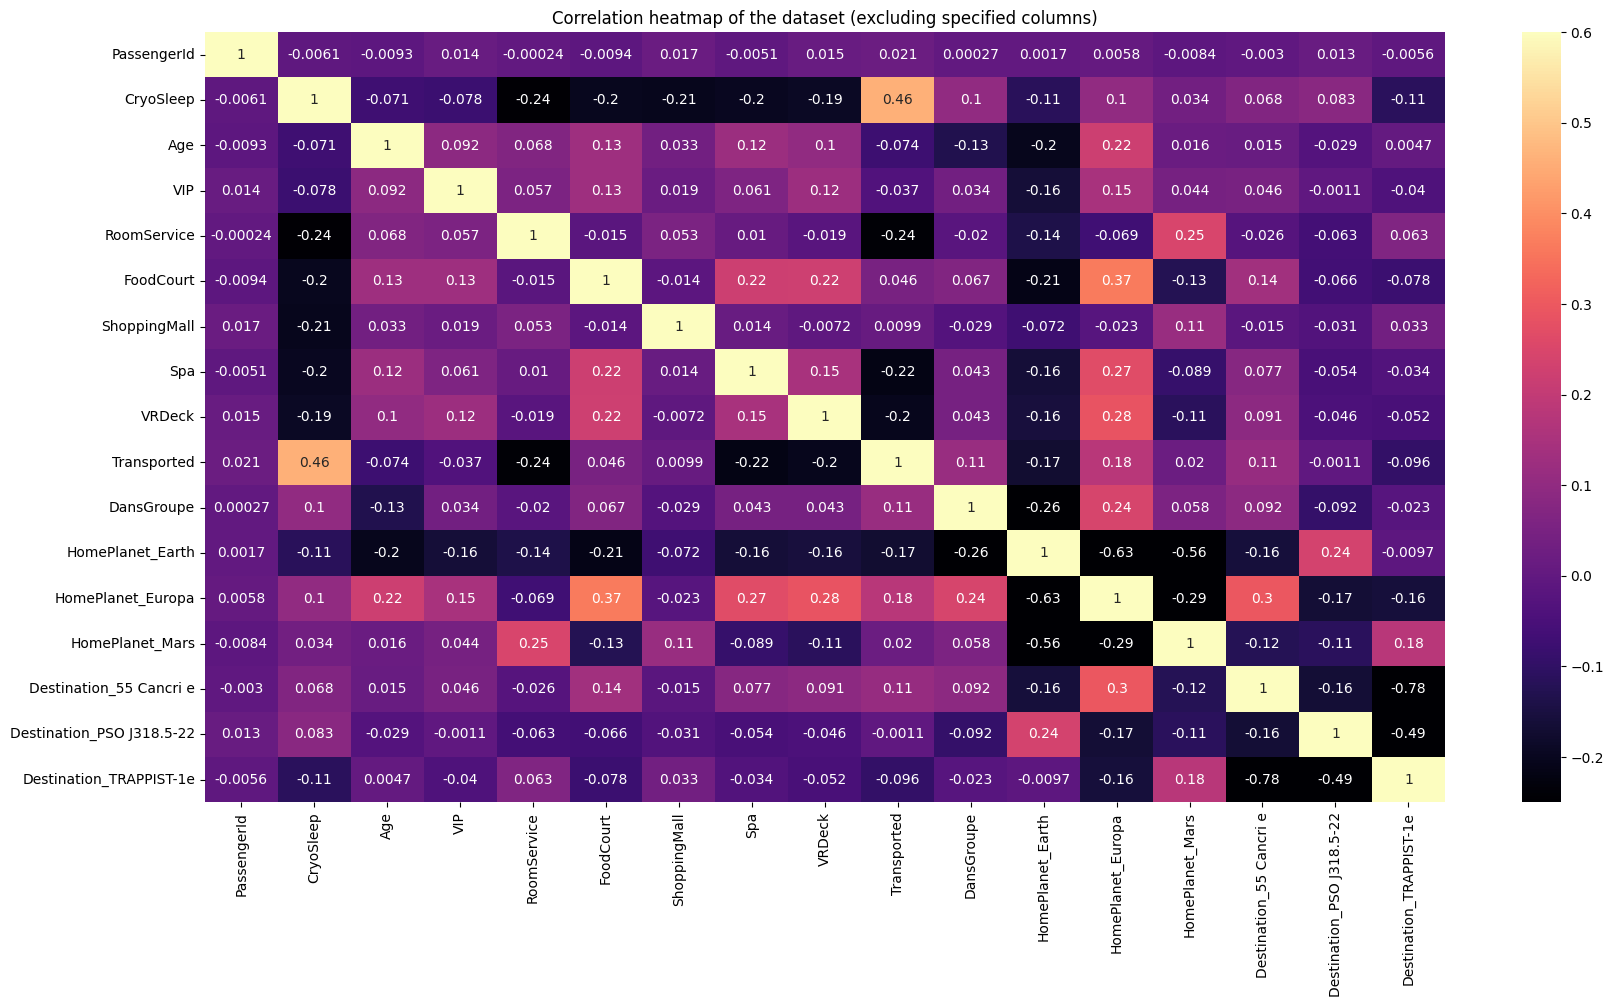

In [67]:


# Suppose 'data_train' contains your dataset

# Exclure les colonnes specifiees
columns_to_exclude = ['Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
data_train_filtered = data_train.drop(columns=columns_to_exclude)

# Calculer la matrice de correlation
correlation_matrix = data_train_filtered.corr()

# Afficher la matrice de correlation
display(correlation_matrix)

# Afficher un heatmap de la matrice de correlation
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, cmap='magma', vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation heatmap of the dataset (excluding specified columns)')
plt.show()


In [68]:

data_train.drop(columns=['PassengerId'], inplace=True)
data_train.drop(columns=['Age'], inplace=True)
def labelEncoder(data_set, data_categorielle):
    label_encoders = {}
    for column in data_categorielle:
        le = LabelEncoder()
        data_set[column] = le.fit_transform(data_train[column].astype(str))
        label_encoders[column] = le

def trouver_colonnes_string(data):
    colonnes_string = []
    for nom_colonne, dtype in data.dtypes.items():
        if dtype != 'float64' and dtype != 'int64':
            colonnes_string.append(nom_colonne)
    return colonnes_string

# Exemple d'utilisation avec votre DataFrame
colonnes_string = trouver_colonnes_string(data_train)
print("Colonnes de type string : ", colonnes_string)
print(data_train.dtypes)



Colonnes de type string :  ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
CryoSleep                       bool
VIP                             bool
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
DansGroupe                      bool
HomePlanet_Earth                bool
HomePlanet_Europa               bool
HomePlanet_Mars                 bool
Destination_55 Cancri e         bool
Destination_PSO J318.5-22       bool
Destination_TRAPPIST-1e         bool
Deck_1.0                        bool
Deck_2.0                        bool
Deck_3.0                        bool
Deck_4.0             

Accuracy: 0.7832087406555491
Confusion Matrix:
[[652 209]
 [168 710]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       861
           1       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



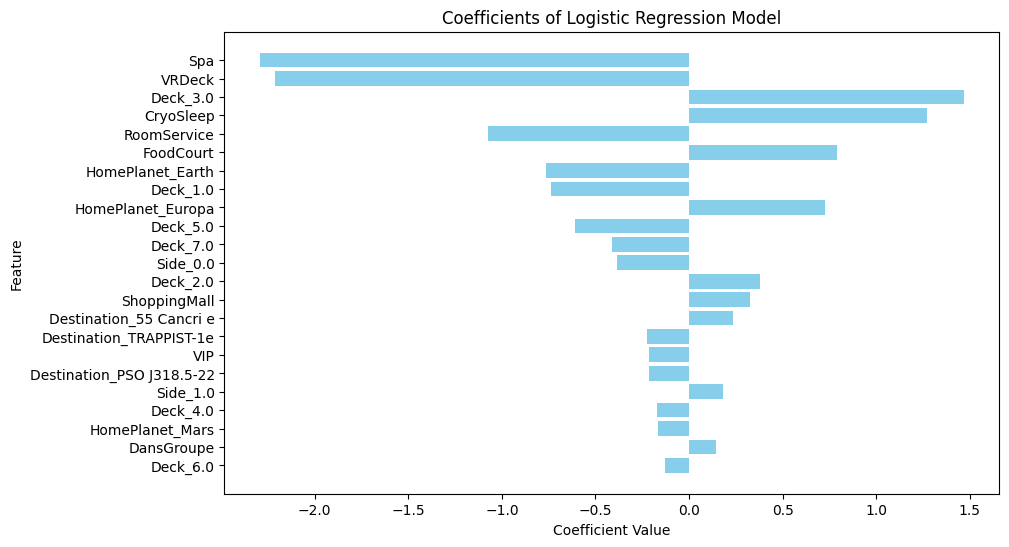

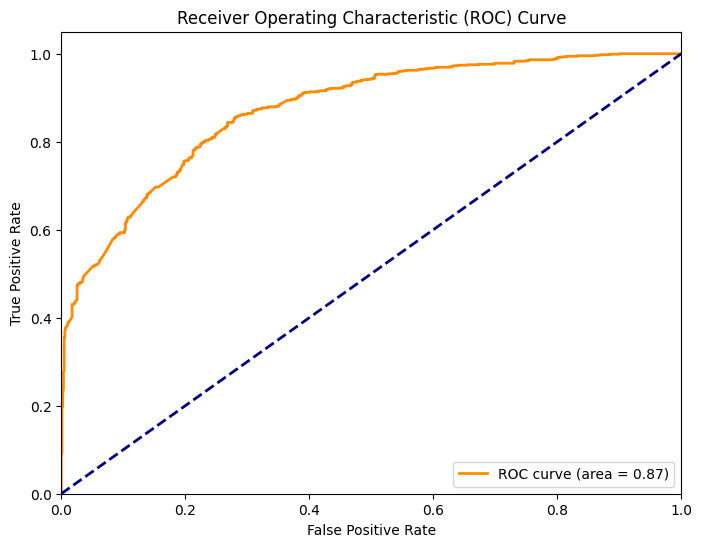

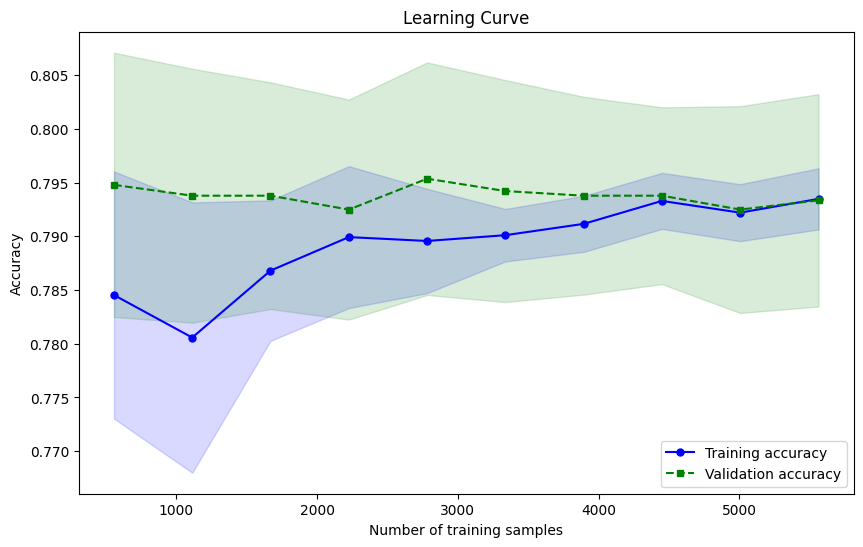

In [69]:


categorielle = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0','Side_0.0', 'Side_1.0']
labelEncoder(data_train, categorielle)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Obtenez les noms des caracteristiques
feature_names = X.columns

# Obtenez les coefficients du modele
coefficients = logistic_regression_model.coef_[0]

# Triez les coefficients par valeur absolue pour une visualisation plus claire
sorted_indices = np.argsort(np.abs(coefficients))
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, color='skyblue')
plt.yticks(range(len(sorted_coefficients)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()


# Calculer les probabilites predites pour les donnees de test
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC et l'aire sous la courbe
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()


# Support Vector Machine

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

labelEncoder(data_train, categorielle)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(class_report)

# Cross validation
scores = cross_val_score(clf, data_train.drop(['Transported'], axis=1), data_train['Transported'], cv=5)
print(f'Cross validation scores: {scores}')
print(f'Cross validation mean score: {scores.mean()}')
print(f'Cross validation standard deviation: {scores.std()}')


Accuracy: 0.7826336975273146
Confusion Matrix:
[[645 216]
 [162 716]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       861
           1       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Cross validation scores: [0.77573318 0.79355952 0.80046003 0.80437284 0.80034522]
Cross validation mean score: 0.7948941596396484
Cross validation standard deviation: 0.01019277104723663


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

categorical_features = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
labelEncoder(data_train, categorical_features)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def optimize_hyperparameters(X_train, y_train, model, param_distributions, cv=5):
    # Recherche bayesienne des hyperparametres
    bayes_search = BayesSearchCV(estimator=model, search_spaces=param_distributions, cv=cv, n_jobs=-1)
    bayes_search.fit(X_train, y_train)

    # Obtention des meilleurs hyperparametres trouves
    best_params = bayes_search.best_params_
    print("Meilleurs hyperparametres trouves:", best_params)

    # Entrainement du modele final avec les meilleurs hyperparametres
    best_model = model.__class__(**best_params)
    best_model.fit(X_train, y_train)

    return best_model

# Definition de l'espace de recherche des hyperparametres
param_distributions = {
    'C': Real(0.01, 10, prior='log-uniform'),  # Valeurs de C a tester en echelle logarithmique
    'gamma': Real(0.0001, 1.0, prior='log-uniform')  # Valeurs de gamma a tester en echelle logarithmique
}

# Creer et entrainer le modele SVM avec recherche bayesienne des hyperparametres
svm_model = SVC(kernel='rbf')  # Autres noyaux possibles : 'rbf' ou 'poly'
best_model = optimize_hyperparameters(X_train, y_train, svm_model, param_distributions, cv=5)

# Evaluation finale sur l'ensemble de test
final_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Precision finale sur l'ensemble de test:", final_accuracy)

# Fonction pour tracer les frontieres de decision
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    h = .02  # Pas de la grille
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1 : CryoSleep')
    plt.ylabel('Feature 2 : VRDeck')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Selection de deux caracteristiques pour la visualisation : choisir les plus correlees avec la variable cible
feature1 = 'CryoSleep'  # Correlation de -0.24 avec Transported
feature2 = 'VRDeck'  # Correlation de -0.22 avec Transported

# Adapter le modele SVM avec seulement deux caracteristiques pour la visualisation
svm_model_2d = SVC(**best_model.get_params())  # Utilisation des meilleurs hyperparametres trouves
svm_model_2d.fit(X_train[[feature1, feature2]], y_train)

# Tracer les frontieres de decision
plot_decision_boundary(X_train[[feature1, feature2]], y_train, svm_model_2d, title='Decision Boundary of SVM Model')

KeyboardInterrupt: 

# Random Forest

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

Meilleurs hyperparametres trouves: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}
Precision sur l'ensemble de test avec les meilleurs hyperparametres trouves: 0.7872340425531915


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


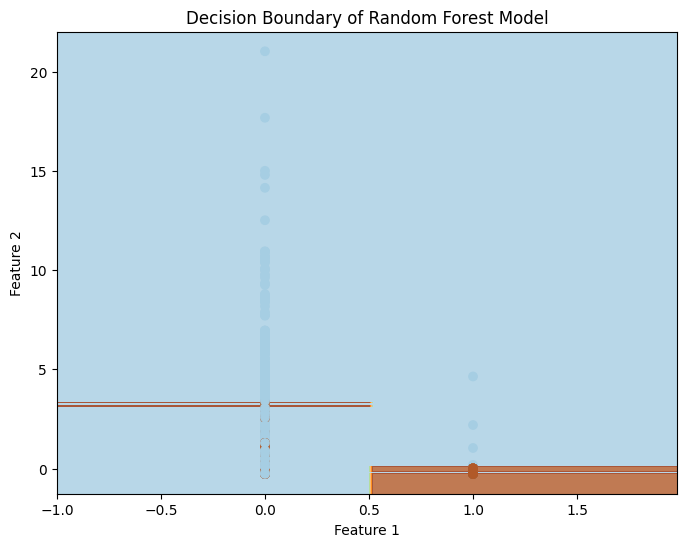

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Definition de l'espace des hyperparametres
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 5, 10],  
    'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False]  
}


rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Meilleurs hyperparametres trouves:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precision sur l'ensemble de test avec les meilleurs hyperparametres trouves:", accuracy)

def plot_decision_boundary_rf(X, y, model, title):
    plt.figure(figsize=(8, 6))
    h = .02  
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

rf_model_2d = RandomForestClassifier(**best_params)
rf_model_2d.fit(X_train[[feature1, feature2]], y_train)

plot_decision_boundary_rf(X_train[[feature1, feature2]], y_train, rf_model_2d, 'Decision Boundary of Random Forest Model')


# AdaBoost

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# Supposez que vous avez deja defini vos donnees d'entrainement et de test : X_train, X_test, y_train, y_test

# Parametres a tester
param_grid = {
    'n_estimators': [50, 100, 150],  # Nombre d'estimateurs dans l'ensemble
    'learning_rate': [0.01, 0.1, 1.0],  # Taux d'apprentissage
}

# Creer et entriner le modele AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)

# Recherche des meilleurs hyperparametres a l'aide de GridSearchCV
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtention des meilleurs hyperparametres trouves
best_params = grid_search.best_params_
print("Meilleurs hyperparametres trouves:", best_params)

# Entrainement du modele final avec les meilleurs hyperparametres
best_model = grid_search.best_estimator_

# Prediction sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modele AdaBoost avec les meilleurs hyperparametres:", accuracy)

# Cross-validation pour evaluer la performance avec les meilleurs hyperparametres
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Scores de validation croisee:", scores)
print("Moyenne des scores de validation croisee:", scores.mean())
print("Ecart-type des scores de validation croisee:", scores.std())



C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

Meilleurs hyperparametres trouves: {'learning_rate': 1.0, 'n_estimators': 100}
Exactitude du modele AdaBoost avec les meilleurs hyperparametres: 0.7883841288096607


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

Scores de validation croisee: [0.78432782 0.78864127 0.7821711  0.79439252 0.81223022]
Moyenne des scores de validation croisee: 0.7923525852215424
Ecart-type des scores de validation croisee: 0.010780676361346157


# XGBoost

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def labelEncoder(data, categorielle):
    le = LabelEncoder()
    for col in categorielle:
        if col in data.columns:
            data[col] = le.fit_transform(data[col])

# Supposons que 'data_train' soit votre DataFrame de donnees

categorielle = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
labelEncoder(data_train, categorielle)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creer et entrainer le modele XGBoost
xgb_model = XGBClassifier()

# Parametres a tester
param_grid = {
    'n_estimators': [50, 100, 150],  # Nombre d'estimateurs dans l'ensemble
    'learning_rate': [0.01, 0.1, 1.0],  # Taux d'apprentissage
    'max_depth': [3, 6, 9],  # Profondeur maximale de l'arbre
    'gamma': [0, 0.1, 0.2]  # Valeur de reduction d'erreur minimale requise pour effectuer une division
}

# Recherche des meilleurs hyperparametres a l'aide de GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtention des meilleurs hyperparametres trouves
best_params = grid_search.best_params_
print("Meilleurs hyperparametres trouves:", best_params)

# Entrainement du modele final avec les meilleurs hyperparametres
best_model = grid_search.best_estimator_

# Prediction sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modele XGBoost avec les meilleurs hyperparametres:", accuracy)

# Cross-validation pour evaluer la performance avec les meilleurs hyperparametres
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Scores de validation croisee:", scores)
print("Moyenne des scores de validation croisee:", scores.mean())
print("Ecart-type des scores de validation croisee:", scores.std())


Meilleurs hyperparametres trouves: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Exactitude du modele XGBoost avec les meilleurs hyperparametres: 0.7826336975273146
Scores de validation croisee: [0.79654925 0.80445723 0.80445723 0.80805176 0.82446043]
Moyenne des scores de validation croisee: 0.8075951776321576
Ecart-type des scores de validation croisee: 0.009234190593514165


In [75]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier()

catboost_model.fit(X_train, y_train)
# Prediction sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modele Catboost: ", accuracy)

# Cross-validation pour evaluer la performance avec les meilleurs hyperparametres
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Scores de validation croisee:", scores)
print("Moyenne des scores de validation croisee:", scores.mean())
print("Ecart-type des scores de validation croisee:", scores.std())

Learning rate set to 0.023581
0:	learn: 0.6801373	total: 3.34ms	remaining: 3.34s
1:	learn: 0.6678012	total: 6.41ms	remaining: 3.2s
2:	learn: 0.6566975	total: 9.41ms	remaining: 3.13s
3:	learn: 0.6476891	total: 12.4ms	remaining: 3.09s
4:	learn: 0.6380664	total: 15.3ms	remaining: 3.04s
5:	learn: 0.6297750	total: 18.1ms	remaining: 3s
6:	learn: 0.6215972	total: 20.9ms	remaining: 2.96s
7:	learn: 0.6139232	total: 23.7ms	remaining: 2.94s
8:	learn: 0.6071384	total: 26.7ms	remaining: 2.94s
9:	learn: 0.6003928	total: 29.5ms	remaining: 2.92s
10:	learn: 0.5927593	total: 32.4ms	remaining: 2.92s
11:	learn: 0.5851091	total: 35.4ms	remaining: 2.91s
12:	learn: 0.5785467	total: 39ms	remaining: 2.96s
13:	learn: 0.5719521	total: 42ms	remaining: 2.96s
14:	learn: 0.5661098	total: 45.3ms	remaining: 2.97s
15:	learn: 0.5607693	total: 48.1ms	remaining: 2.96s
16:	learn: 0.5551098	total: 51ms	remaining: 2.95s
17:	learn: 0.5507695	total: 53.8ms	remaining: 2.94s
18:	learn: 0.5465886	total: 56.4ms	remaining: 2.91s
19

Scores de validation croisee: [0.79079799 0.8023005  0.80301941 0.80373832 0.82374101]
Moyenne des scores de validation croisee: 0.8047194451484103
Ecart-type des scores de validation croisee: 0.010633257513457908
Exactitude du modele Gradient Boosting: 0.7809085681426107


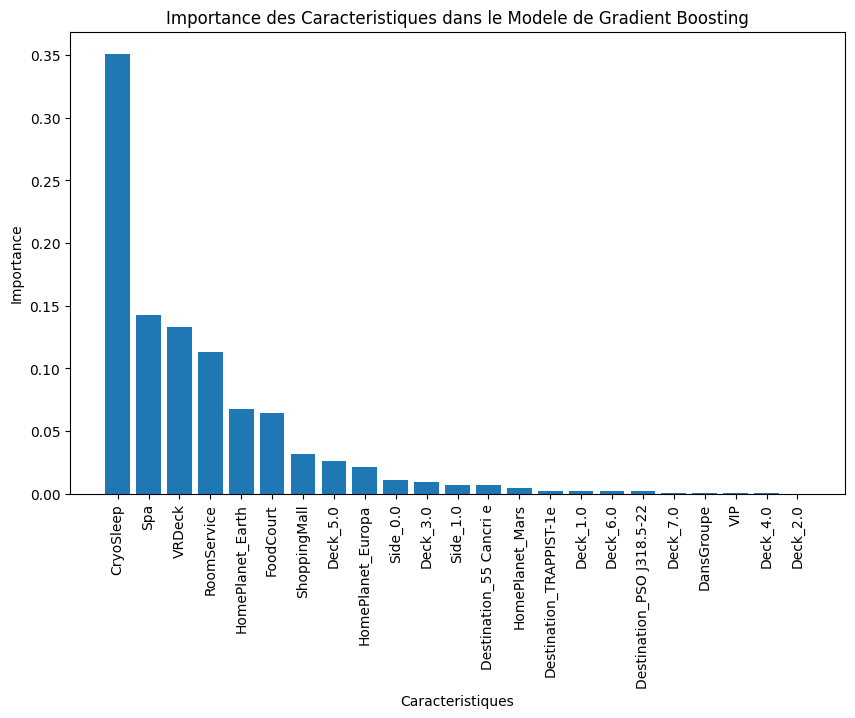

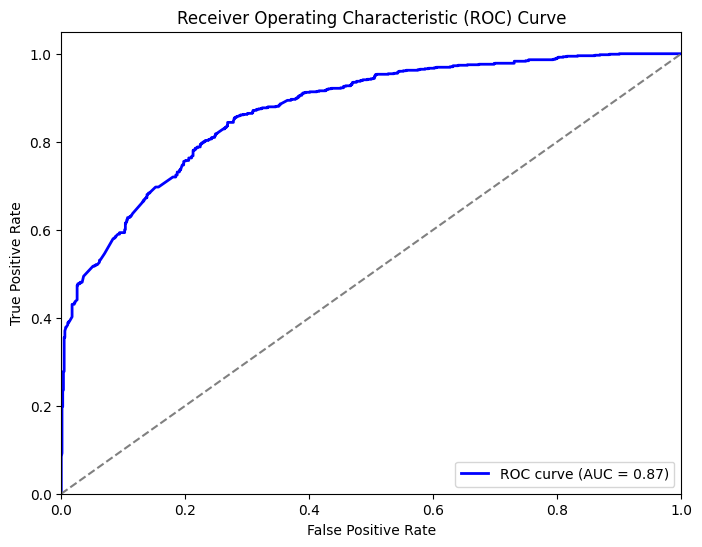

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

gb_model = GradientBoostingClassifier(loss="exponential")

scores = cross_val_score(gb_model, X_train, y_train, cv=5)

print("Scores de validation croisee:", scores)
print("Moyenne des scores de validation croisee:", scores.mean())
print("Ecart-type des scores de validation croisee:", scores.std())

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modele Gradient Boosting:", accuracy)

feature_importance = gb_model.feature_importances_

sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Caracteristiques')
plt.ylabel('Importance')
plt.title('Importance des Caracteristiques dans le Modele de Gradient Boosting')
plt.show()



fpr, tpr, _ = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [77]:
def detecter_groupe(data_test):
    data_test['Group'] = data_test['PassengerId'].str[:4]
    occurences_groupes = data_test['Group'].value_counts()
    data_test['DansGroupe'] = data_test['Group'].map(occurences_groupes) > 1


detecter_groupe(data_test)
    
    
def remplir_colonne_par_groupe(data_test, colonne):
    modif_grp = 0
    
    for groupe in data_test['Group'].unique():
        groupe_data = data_test[data_test['Group'] == groupe]
        groupe_non_nul = groupe_data.dropna(subset=[colonne])     
        valeur_frequente = groupe_non_nul[colonne].mode()
        
        if not valeur_frequente.empty:
            valeur_frequente = valeur_frequente.iloc[0]
            groupe_nan = groupe_data[groupe_data[colonne].isnull()]
            data_test.loc[groupe_nan.index, colonne] = valeur_frequente
            modif_grp += len(groupe_nan)
    
    return modif_grp


def remplacer_valeurs(data_test, colonnes):
    modifs = {}
    for colonne in colonnes:
        print(f"Nombre de case vide dans {colonne} avant 1ere modif: {data_test[colonne].isnull().sum()}")
        modifs[colonne] = remplir_colonne_par_groupe(data_test, colonne)
    
    for colonne in colonnes:
        valeur_frequente = data_test[colonne].mode()[0]
        data_test[colonne] = data_test[colonne].fillna(valeur_frequente)


colonnes_a_modifier = ["HomePlanet", "Destination", "VIP"]
remplacer_valeurs(data_test, colonnes_a_modifier)


def remplacer_valeurs_cryosleep(data_test):
    valeur = data_test["CryoSleep"].mode()[0]
    data_test["CryoSleep"] = data_test["CryoSleep"].fillna(valeur)



def remplacer_valeurs_manquantes_age(data_test):
    moyenne_age = data_test['Age'].mean()
    data_test['Age'] = data_test['Age'].fillna(moyenne_age)


def remplacer_valeurs_depense(data_test):
    colonnes = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    moyennes = data_test[colonnes].mean()

    for colonne in colonnes:
        data_test[colonne] = data_test[colonne].fillna(
            data_test.apply(lambda row: moyennes[colonne] if row['Age'] >= 12 else 0, axis=1)
        )


remplacer_valeurs_cryosleep(data_test)
remplacer_valeurs_depense(data_test)
remplacer_valeurs_manquantes_age(data_test)
data_test.drop(columns=['Name'], inplace=True)
data_test.drop(columns=['Group'], inplace=True)
print(data_test.isnull().sum())


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_num_stand = scaler.fit_transform(data_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
data_num_stand = pd.DataFrame(data_num_stand, columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])

colonnes = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for colonne in colonnes:
    data_test[colonne] = data_num_stand[colonne] 
    

data_test[['Deck', 'Num', 'Side']] = data_test['Cabin'].str.extract(r'([A-G])/(\d+)/([PS])')

deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
data_test['Deck'] = data_test['Deck'].map(deck_mapping)

data_test['Side'] = data_test['Side'].map({'P': 0, 'S': 1})

data_test['Deck'] = pd.to_numeric(data_test['Deck'])
data_test['Num'] = pd.to_numeric(data_test['Num'])


def remplacer_valeurs_manquantes(row):
    if pd.isnull(row['Deck']):
        if row['HomePlanet'] == 'Europa':
            return np.random.choice([2.0, 3.0])
        elif row['HomePlanet'] == 'Mars':
            return np.random.choice([4.0, 5.0, 6.0])
        elif row['HomePlanet'] == 'Earth':
            return np.random.choice([6.0, 7.0])
    else:
        return row['Deck']

data_test['Deck'] = data_test.apply(remplacer_valeurs_manquantes, axis=1)

data_test['Side'].fillna(data_test['Side'].mode()[0], inplace=True)

print(data_test.isnull().sum())


homeplanet_dummies = pd.get_dummies(data_test["HomePlanet"], prefix="HomePlanet")
destination_dummies = pd.get_dummies(data_test["Destination"], prefix="Destination")

data_test = pd.concat([data_test, homeplanet_dummies, destination_dummies], axis=1)

data_test.drop(columns=['Destination'], inplace=True)
data_test.drop(columns=['HomePlanet'], inplace=True)
print(data_test)


# deck_dummies = pd.get_dummies(data_test_tr['Num'], prefix='Num')
side_dummies = pd.get_dummies(data_test['Side'], prefix='Side')
deck_dummies = pd.get_dummies(data_test['Deck'], prefix='Deck')


data_test = pd.concat([data_test, deck_dummies, side_dummies], axis=1)


data_test.drop('Deck', axis=1, inplace=True)
data_test.drop('Num', axis=1, inplace=True)
data_test.drop('Side', axis=1, inplace=True)
data_test.drop('Cabin', axis=1, inplace=True)

print(data_test.head())
data_test.to_csv('data_test_tr.csv', index=False)
data_test = pd.read_csv('data_test_tr.csv')



data_test.drop(columns=['PassengerId'], inplace=True)
data_test.drop(columns=['Age'], inplace=True)

def labelEncoder(data_set, data_categorielle):
    label_encoders = {}
    for column in data_categorielle:
        le = LabelEncoder()
        data_set[column] = le.fit_transform(data_test[column].astype(str))
        label_encoders[column] = le

def trouver_colonnes_string(data):
    colonnes_string = []
    for nom_colonne, dtype in data.dtypes.items():
        if dtype != 'float64' and dtype != 'int64':
            colonnes_string.append(nom_colonne)
    return colonnes_string

# Exemple d'utilisation avec votre DataFrame
colonnes_string = trouver_colonnes_string(data_test)
print("Colonnes de type string : ", colonnes_string)
print(data_test.dtypes)


Nombre de case vide dans HomePlanet avant 1ere modif: 87
Nombre de case vide dans Destination avant 1ere modif: 92
Nombre de case vide dans VIP avant 1ere modif: 93


C:\Users\valen\AppData\Local\Temp\ipykernel_24548\1428854643.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test[colonne] = data_test[colonne].fillna(valeur_frequente)
C:\Users\valen\AppData\Local\Temp\ipykernel_24548\1428854643.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test["CryoSleep"] = data_test["CryoSleep"].fillna(valeur)
C:\Users\valen\AppData\Local\Temp\ipykernel_24548\1428854643.py:107: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The b

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
DansGroupe        0
dtype: int64
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
DansGroupe        0
Deck              0
Num             106
Side              0
dtype: int64
     PassengerId  CryoSleep     Cabin        Age    VIP  RoomService  \
0        0013_01       True     G/3/S  27.000000  False    -0.364143   
1        0018_01      False     F/4/S  19.000000  False    -0.364143   
2        0019_01       True     C/0/S  31.000000  False    -0.364143   
3        0021_01      False     C/1/S  38.000000  False    -0.364143   
4        0023_01      False     F/

In [81]:
categorielle = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0','Side_0.0', 'Side_1.0']
labelEncoder(data_test, categorielle)

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

X_test = data_test

model = GradientBoostingClassifier(loss="exponential")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Meilleurs paramètres trouvés :
{'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 150}


In [82]:
y_pred.tolist()
y_pred
y_predediction = y_pred.astype('bool')
test = pd.read_csv('test.csv')

In [84]:
Submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_predediction})
Submission.to_csv('SubmissionGradientBoostingHyper.csv', index=False)
Submission


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
